# Matemáticas para Inteligencia Artificial (II)



### 1. Matrices invertibles



Recordemos que una matriz $A\in\mathcal{M}_{n\times n}(\mathbb{R})$, con $n\in\mathbb{N}$, es **invertible** si existe otra matriz $B \in\mathcal{M}_{n\times n}(\mathbb{R})$ tal que $AB=BA=I_n$, la matriz identidad de tamaño $n\times n$. En este caso, denotamos a $B$ por $A^{-1}$ y diremos que es la **inversa de** $A$. Se puede demostrar fácilmente que la inversa de $A$ existe si, y sólo si, $|A|\neq 0$. Veamos algunos ejemplos con Python. Trabajemos con la siguiente matriz.

$$ A = \begin{pmatrix} 0&-2&3 \\ -4&6&0\\ 2&-5&5\end{pmatrix}.$$

In [85]:
import numpy as np
from numpy import linalg as la
np.set_printoptions()

In [86]:
A=np.array([[0,-2,3],[-4,6,0],[2,-5,5]])
print(A)

[[ 0 -2  3]
 [-4  6  0]
 [ 2 -5  5]]


In [87]:
la.det(A)     # luego A es invertible

-15.999999999999998

In [88]:
inv=la.inv(A)
print(inv)

[[-1.875   0.3125  1.125 ]
 [-1.25    0.375   0.75  ]
 [-0.5     0.25    0.5   ]]


### 2. Valores propios, vectores propios y diagonalización de matrices


Recordemos que, dada una matriz $A\in\mathcal{M}_{n\times n}(\mathbb{R})$, un **valor propio de $\pmb{A}$** (o **autovalor de $\pmb{A}$**) es un número $\lambda\in\mathbb{C}$ para el cual existe un vector $\pmb{0}\neq v\in\mathbb{C}^n$, denominado **vector propio de $\pmb{A}$** (o **autovector de $\pmb{A}$**), cumpliendo la igualdad $A\cdot v = \lambda \cdot v$. En otras palabras, un vector propio de $A$ es un vector que $A$ transforma en un múltiplo de él, dejando invariante por tanto su dirección. El conjunto formado por todos los valores propios de $A$ se denota por $\sigma(A)$, y el conjunto de todos los vectores propios de $A$ asociados a $\lambda$ se denota por $E(\lambda)$ y forma un subespacio vectorial de $\mathbb{C}^n$ cuando añadimos al vector nulo.


Observemos que la igualdad anterior equivale a $(A-\lambda\cdot I)\cdot v = \pmb{0}$. Si el rango de $A-\lambda\cdot I$ es $n$, entonces dicho sistema tiene como única solución $v=\pmb{0}$, lo cual no nos interesa. Por tanto, queremos ver cuándo $A-\lambda\cdot I$ no tiene rango máximo o, en otras palabras, cuándo $|A-\lambda\cdot I|=0$. Así es como se calculan a mano los valores propios. Los vectores propios asociados a $\lambda$ se pueden calcular a través del núcleo de $A-\lambda\cdot I$.


Unas propiedades importantes de los valores propios son que $|A|=\displaystyle\prod_{\lambda\in\sigma(A)} \lambda$ y $\operatorname{traza}(A)=\displaystyle\sum_{\lambda\in\sigma(A)} \lambda$. En particular, existe $A^{-1}$ si, y sólo si, $0\notin\sigma(A)$. También es destacable que los vectores propios asociados a valores propios distintos son necesariamente linealmente independientes.


Veamos cómo calcular estos elementos con Python. Trabajaremos a modo de ejemplo con la matriz 

$$A=\begin{pmatrix} 3&-2&0 \\ -2&-1&0 \\ 0&0&1\end{pmatrix}.$$

In [89]:
A=np.array([[3,-2,0],[-2,-1,0],[0,0,1]])
print(A)

[[ 3 -2  0]
 [-2 -1  0]
 [ 0  0  1]]


In [90]:
autovalores, autovectores = la.eig(A)           # Autovectores = P

print(autovalores, "\n")                        # j es el número imaginario i.
print(np.round(autovectores, 3))

[ 3.82842712 -1.82842712  1.        ] 

[[ 0.924  0.383  0.   ]
 [-0.383  0.924  0.   ]
 [ 0.     0.     1.   ]]


In [91]:
print(np.round(np.prod(autovalores),3))
print(np.round(la.det(A),3))

-7.0
-7.0


In [92]:
print(np.round(np.sum(autovalores),3))
print(np.round(np.trace(A),3))

3.0
3


En el caso de que la matriz $A$ tenga **$n$ vectores propios linealmente independientes**, y sólamente en ese caso, la matriz $A$ se puede **diagonalizar**: se cumple que $P^{-1}\cdot A \cdot P=D$ donde $D$ es una matriz diagonal formada por los autovalores de $A$ y $P$ es una matriz cuya columna $i$-ésima es vector propio asociado al valor propio en la entrada diagonal $i$-ésima de $D$. Notemos que $P$ es invertible porque sus columnas son linealmente independientes por hipótesis, luego tiene rango $n$.


En particular, si $A$ tiene $n$ valores propios distintos, entonces como hemos comentado anteriormente tendrá $n$ vectores propios linealmente independientes y, por tanto, será siempre diagonalizable. Luego la matriz del ejemplo anterior (que tenía 2 autovalores complejos conjugados y uno real) es diagonalizable seguro.

In [93]:
la.matrix_rank(autovectores)

3

In [94]:
np.round(la.inv(autovectores)@A@autovectores,3)

array([[ 3.828,  0.   ,  0.   ],
       [ 0.   , -1.828,  0.   ],
       [ 0.   ,  0.   ,  1.   ]])

Esta igualdad tiene numerosas aplicaciones. Por ejemplo, como $A=P\cdot D \cdot P^{-1}$, entonces resulta _sencillo_ calcular potencias de $A$, pues $A^k=P\cdot D^k\cdot P^{-1}$, siendo $D^{k}$ fácil de calcular al ser $D$ una matriz diagonal.


Si $A$ no tiene $n$ vectores propios distintos, entonces no será diagonalizable. Por ejemplo:

In [95]:
A=np.array([[1,1,0],[0,1,0],[0,0,1]])
autovalores, autovectores=la.eig(A)
print(autovalores, "\n")
print(np.round(autovectores,3), "\n")
print(la.matrix_rank(autovectores))
print(sum(autovalores))

[1. 1. 1.] 

[[ 1. -1.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  1.]] 

2
3.0



**Proposición.** Si $A$ es simétrica (i.e. $A=A^t$), entonces sus valores propios son todos reales.

(Para demostrarlo, basta con ver que $A^2v=\lambda^2 v$ y tomar el cuadrado de la norma de $Av$.)

### 3. Descomposición en Valores Singulares (SVD)


La diagonalización de matrices tiene sentido cuando hablamos de matrices cuadradas. Pero, en general, si $A\in\mathcal{M}_{n\times m}(\mathbb{C})$, también existe otro tipo de descomposición denominada **descomposición en valores singulares** (SVD por sus siglas en inglés), la cual descompone $A=U\cdot \Sigma\cdot V$. En el caso que $A$ sea real (que será el que vamos a trabajar) se cumple que:

- $U$ y $V$ son matrices ortogonales (no únicas) de dimensiones $n\times n$ y $m\times m$, respectivamente.
- $\Sigma$ es una matriz $n\times m$ cuyas entradas fuera de la diagonal principal son nulas.
- $A^t A$ tiene valores propios reales y positivos (por ser una matriz simétrica y definida positiva).
- Si $A$ tiene rango $r$, entonces $\sigma(A^tA)$ contiene $r$ valores propios no nulos $\{\sigma_1^2,...,\sigma_r^2\}$; sus raíces cuadradas se denominan **valores singulares de $\pmb{A}$**.
- Si suponemos que están ordenados $\sigma_1^2\geq \cdots \geq \sigma_r^2 > 0$, entonces las entradas de la diagonal principal de $\Sigma$ son $\{\sigma_1,...,\sigma_r,0,...,0\}$.


Si nos fijamos en la estructura de estas matrices, tenemos lo siguiente:


\begin{eqnarray*} A&=&U\cdot \Sigma \cdot V \\&=& \begin{pmatrix}  &  &  \\ \vec{u_1} & \cdots & \vec{u_n} \\  &  &  \end{pmatrix} \cdot \begin{pmatrix} \sigma_1 & 0 & \cdots \\ 0 & \sigma_2 & \cdots \\ \vdots & \vdots & \ddots \end{pmatrix} \cdot \begin{pmatrix}  & \vec{v_1} &  \\  & \vdots &  \\  & \vec{v_m} &  \end{pmatrix} \\\ &=& \begin{pmatrix}  &  &  \\ \sigma_1\cdot \vec{u_1} & \cdots & \sigma_n\cdot\vec{u_n} \\  &  &  \end{pmatrix} \cdot \begin{pmatrix}  & \vec{v_1} &  \\  & \vdots &  \\  & \vec{v_m} &  \end{pmatrix} \\ &=&  \sigma_1\cdot \vec{u_1}\cdot \vec{v_1} + \cdots + \sigma_r\cdot \vec{u_r}\cdot \vec{v_r}+0\cdot\vec{u_{r+1}}\cdot \vec{v_{r+1}}+\cdots \\ &=& \displaystyle\sum_{i=1}^{r} \sigma_i\cdot \vec{u_i}\cdot\vec{v_i}, \end{eqnarray*}

donde $\vec{u_i}$ y $\vec{v_i}$ son vectores unitarios columna y fila, respectivamente, que son autovectores de $AA^t$ y $A^tA$. Como sólamente hay $r$ valores singulares no nulos, entonces a veces se toman $U$, $\Sigma$ y $V$ de dimensiones $n\times r$, $r\times r$ y $r\times m$, respectivamente, y por ello en el sumatorio anterior aparece el índice $1\leq i \leq r$. Esto significa que **las primeras columnas de $\pmb{U}$ y las primeras filas de $\pmb{V}$ contribuyen más en la construcción de $\pmb{A}$** que el resto. De hecho, se tiene el siguiente teorema:


**Teorema.** Sea $A\in\mathcal{M}_{n\times m}(\mathbb{R})$. Si $A_k$ es la descomposición SVD de $A$ utilizando los mayores $k$ valores singulares, entonces $A_k$ es la solución del problema $\operatorname{min} ||A-\hat{A}||_F$ bajo la restricción $\operatorname{rango}(\hat{A})=k$, donde $||M||_F=\operatorname{traza}(M^t\cdot M)$.


Este teorema tiene múltiples aplicaciones, por ejemplo en la **compresión de imágenes**. 

Veamos cómo obtener esta descomposición directamente utilizando Python. Consideremos la matriz $A=\begin{pmatrix} 1&0&0&0&2\\0&0&3&0&0\\0&0&0&0&0\\ 0&2&0&0&0 \end{pmatrix}$.

In [96]:
A=np.array([[1,0,0,0,2],[0,0,3,0,0],[0,0,0,0,0],[0,2,0,0,0]])
print(A)
print(la.eig(A.T@A)[0])
print(la.eig(A@A.T)[0])
print(A.T@A)
print(A@A.T)
# Los valores singulares se ordenan de mayor a menor y s ehace las raices cuadraddas de estos numeros (la matriz S)

# El valor de r es ·, puesto que es el número de valroes positivos, NO NULOS,  que tiene el conjunto de valores singulares,
# es el valor del rango la matriz

[[1 0 0 0 2]
 [0 0 3 0 0]
 [0 0 0 0 0]
 [0 2 0 0 0]]
[0. 5. 4. 9. 0.]
[5. 9. 0. 4.]
[[1 0 0 0 2]
 [0 4 0 0 0]
 [0 0 9 0 0]
 [0 0 0 0 0]
 [2 0 0 0 4]]
[[5 0 0 0]
 [0 9 0 0]
 [0 0 0 0]
 [0 0 0 4]]


In [97]:
U,S,V=la.svd(A)
print(U,"\n")
print(S,"\n")
print(V)

[[ 0.  1.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  0. -1.]
 [ 0.  0.  1.  0.]] 

[3.         2.23606798 2.         0.        ] 

[[-0.          0.          1.          0.          0.        ]
 [ 0.4472136   0.          0.          0.          0.89442719]
 [-0.          1.          0.          0.          0.        ]
 [ 0.          0.          0.          1.          0.        ]
 [-0.89442719  0.          0.          0.          0.4472136 ]]


In [98]:
U@np.diag(S)@V # Si no se añade la propiedad full_matrices=False, se pierde una fil/col y, al no ser cuadrada, no se puede operar

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 5 is different from 4)

Si nos fijamos, las dimensiones no cuadran para hacer el producto de la descomposición. Esto se debe a que `np.diag(S)` nos devuelve por defecto una matriz simétrica, cuando nuestra $\Sigma$ debe tener dimensión $4\times 5$ (i.e. la misma dimensión que $A$).

Lo podemos arreglar con el argumento extra `full_matrices=False`.

In [99]:
U,S,V=la.svd(A, full_matrices=False)
print(U,"\n")
print(S,"\n")
print(V)

[[ 0.  1.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  0. -1.]
 [ 0.  0.  1.  0.]] 

[3.         2.23606798 2.         0.        ] 

[[-0.          0.          1.          0.          0.        ]
 [ 0.4472136   0.          0.          0.          0.89442719]
 [-0.          1.          0.          0.          0.        ]
 [ 0.          0.          0.          1.          0.        ]]


In [100]:
print(np.round(U@np.diag(S)@V,3))

[[1. 0. 0. 0. 2.]
 [0. 0. 3. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0.]]


Veamos que, efectivamente, el sumatorio anterior con los 3 valores singulares ya nos proporciona $A$.

In [103]:
print((S[0:3]*U[:,0:3])@V[0:3,:], "\n")
print(S[0]*U[:, 0:1]@V[0:1, :] + S[1]*U[:, 1:2]@V[1:2, :] + S[2]*U[:, 2:3]@V[2:3, :]) # Verifica la ecuación de sum(sigma_i * u_i * v_i) 

[[1. 0. 0. 0. 2.]
 [0. 0. 3. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0.]] 

[[1. 0. 0. 0. 2.]
 [0. 0. 3. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0.]]


A continuación, vamos a definir una función que, dada la descoposición SVD de una matriz, nos la aproxime en función de $k$ valores singulares que deseemos.

In [104]:
def aprox_SVD(U,S,V,k):
    return (S[0:k]*U[:,0:k])@V[0:k,:]

In [105]:
print("A1 \n", aprox_SVD(A,S,V,1), "\n")
print("A2 \n", aprox_SVD(A,S,V,2), "\n")
print("A3 \n", aprox_SVD(A,S,V,3))
print("A4 \n", aprox_SVD(A,S,V,4))     # Ya no ganas nada

A1 
 [[0. 0. 3. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]] 

A2 
 [[0. 0. 3. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 4.]] 

A3 
 [[0. 0. 3. 0. 0.]
 [0. 6. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 4.]]
A4 
 [[0. 0. 3. 0. 0.]
 [0. 6. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [2. 0. 0. 0. 4.]]


### 4. Compresión de imágenes


La clave para trabajar matemáticamente con imágenes es la siguiente: **una imagen en blanco y negro es una matriz** donde el valor de **cada entrada te determina la intensidad del píxel** correspondiente. Veamos un ejemplo de cómo transformar una imagen en color a blanco y negro, y posteriormente cómo transformarla en una matriz de este tipo.

In [110]:
import matplotlib.pyplot as plt
from PIL import Image

<PIL.Image.Image image mode=L size=3024x4032 at 0x20AC987C0E0>


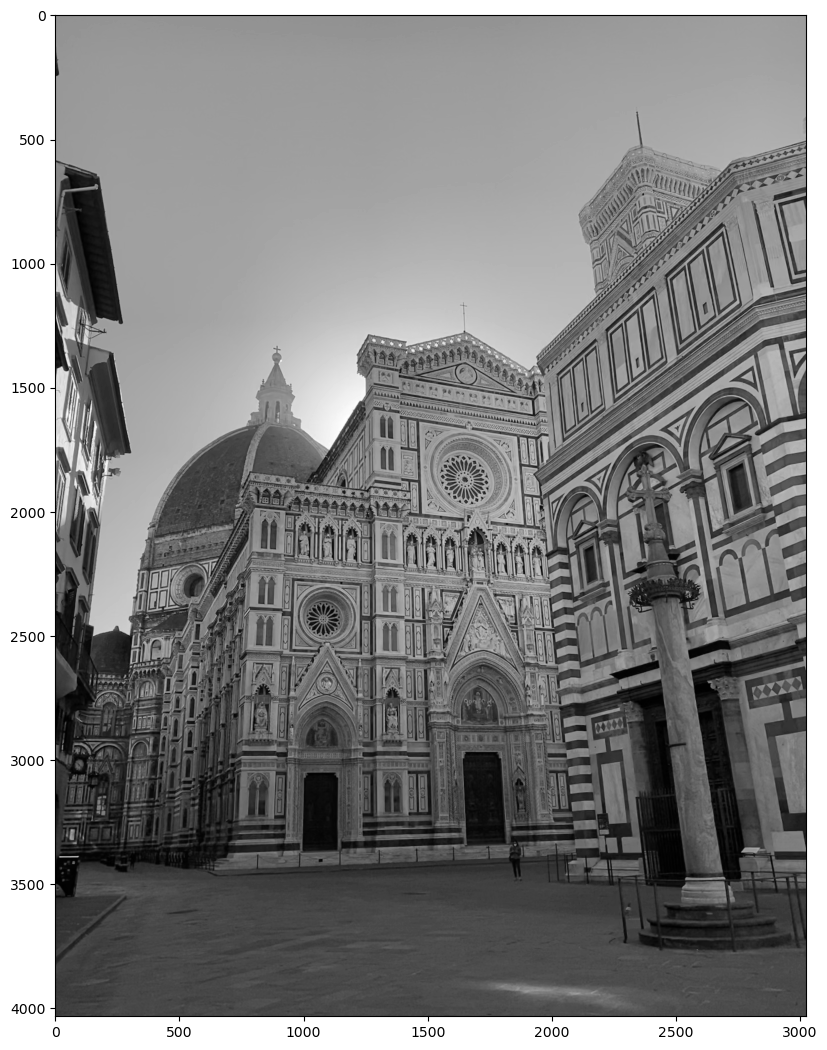

In [113]:
foto = Image.open('Chp2_Unit4_firenze.png')
foto_BN = foto.convert('L')                  # Luminance = 'L', RGB = 'RGB'
plt.figure(figsize=(10, 13))
plt.imshow(foto_BN, cmap='gray');            # Dibuja la imagen

(4032, 3024)


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



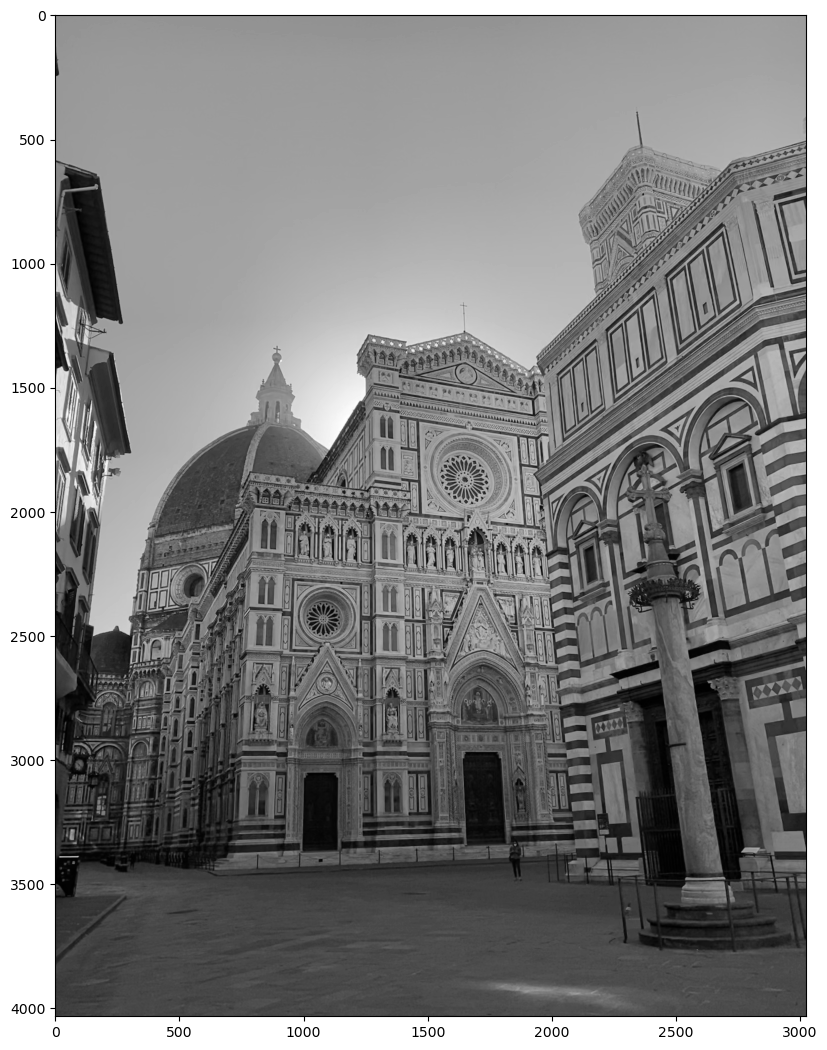

In [116]:
foto_mat=np.asarray(foto_BN)           # Convierte a un array (matrix-like)
print(foto_mat.shape)                  # Si es una RGB, se convierte en una matriz 3Dimensional (hstack, vstack, dstack)
plt.figure(figsize=(10, 13))
plt.imshow(foto_mat, cmap='gray');     # Dibuja la imagen con la matriz dada
print(foto_mat)                        # Matriz con la que se dibuja la imagen, con 'RGB', selecciona plt.imshow(foto_mat[:, :, 0], cmap'reds')

Ahora comprimiremos dicha imagen a través de una aproximación de su matriz asociada, utilizando su descomposición SVD. Veamos primero cuál es el rango de la matriz, para ver "hasta dónde" podemos aproximar la matriz.

In [117]:
la.matrix_rank(foto_mat)

3024

Veamos cómo quedaría la imagen con una aproximación que coja solamente los 10 primeros valores singulares.

In [118]:
Umat,Smat,Vmat=la.svd(foto_mat, full_matrices=False)

Vamos a mostrar la ecuación de similitud

In [130]:
np.set_printoptions(suppress=True, threshold=np.inf, formatter={'float_kind': '{:.6f}'.format})
print(Smat)

[416587.412081 47198.382568 37172.201551 32331.181382 26988.988776
 25931.056745 20415.483218 19399.630150 18609.116963 18317.123965
 16859.913519 16462.579268 15389.931989 14803.005618 14331.310784
 13299.832135 12938.236323 12792.711393 12541.655835 12445.903225
 12181.050079 11888.102197 11485.349790 11225.683669 10622.203969
 10184.538482 10024.572878 9912.373654 9688.811070 9574.092597 9386.420701
 9289.179063 9080.442505 8979.071929 8864.351513 8659.990008 8550.656126
 8498.953453 8271.401735 8154.370408 8065.365542 8019.065164 7738.730385
 7638.809689 7619.526025 7503.417277 7405.464676 7254.103174 7216.619415
 7096.091450 7001.325466 6862.311204 6768.160403 6633.608135 6601.619361
 6521.327844 6491.928196 6447.362807 6339.893821 6288.731481 6266.881659
 6215.798975 6093.109977 5991.368077 5966.945763 5930.324099 5841.260700
 5775.794362 5720.577514 5648.204613 5579.302054 5557.830330 5491.652377
 5423.732311 5366.264244 5321.223885 5284.111940 5253.785201 5203.171377
 5156.7167

Valor  Proporcion  Acumulado
0     416587.412081    0.179510   0.179510
1      47198.382568    0.020338   0.199848
2      37172.201551    0.016018   0.215866
3      32331.181382    0.013932   0.229797
4      26988.988776    0.011630   0.241427
...             ...         ...        ...
3019       2.976038    0.000001   0.999995
3020       2.959835    0.000001   0.999996
3021       2.903195    0.000001   0.999998
3022       2.883700    0.000001   0.999999
3023       2.821456    0.000001   1.000000

[3024 rows x 3 columns]

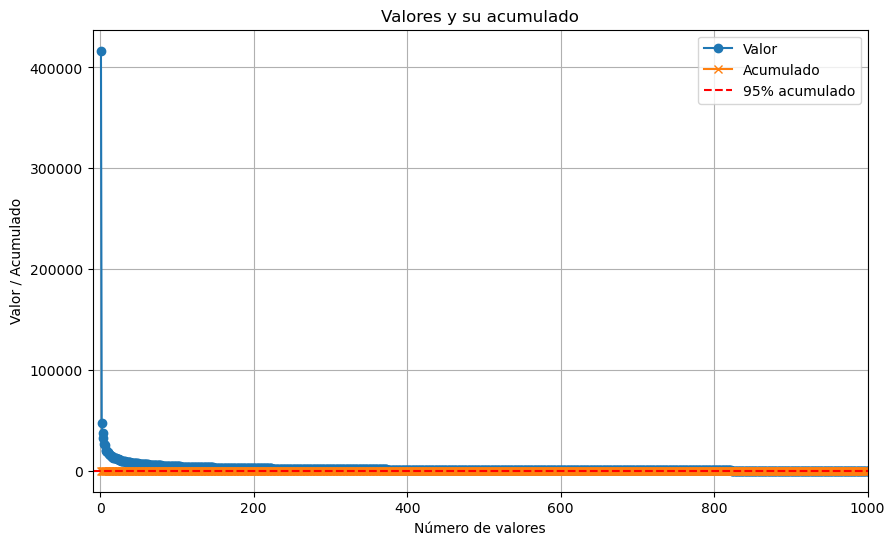

In [134]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'Valor': Smat,
})
df['Proporcion'] = df['Valor'] / df['Valor'].sum()
df['Acumulado'] = df['Proporcion'].cumsum()

display(df)
plt.figure(figsize=(10, 6))
plt.plot(df.index + 1, df['Valor'], marker='o', label='Valor'); plt.plot(df.index + 1, df['Acumulado'], marker='x', label='Acumulado')
plt.axhline(0.95, color='r', linestyle='--', label='95% acumulado'); plt.xlabel('Número de valores'); plt.ylabel('Valor / Acumulado'); plt.title('Valores y su acumulado'); plt.xlim(-10, 1000)
plt.legend(); plt.grid(True); plt.show()

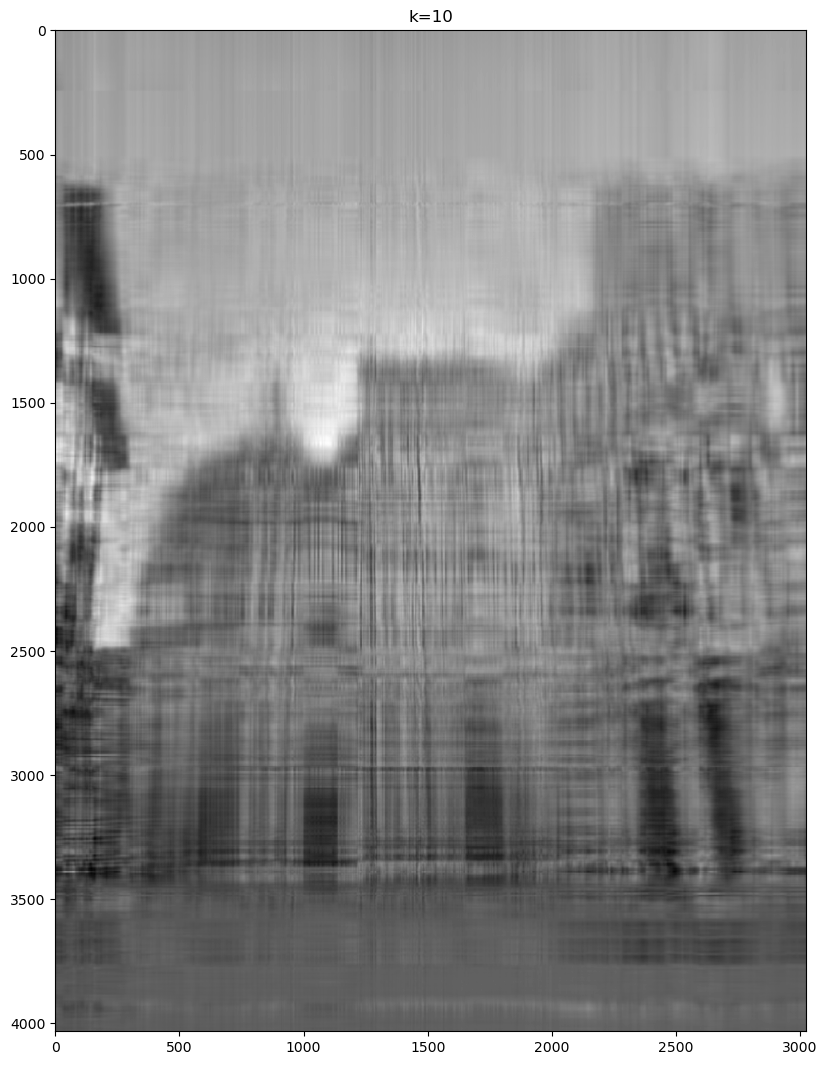

In [131]:
foto_mat_10=aprox_SVD(Umat,Smat,Vmat,10)
plt.figure(figsize=(10, 13))
plt.title("k=10")
plt.imshow(foto_mat_10, cmap='gray');

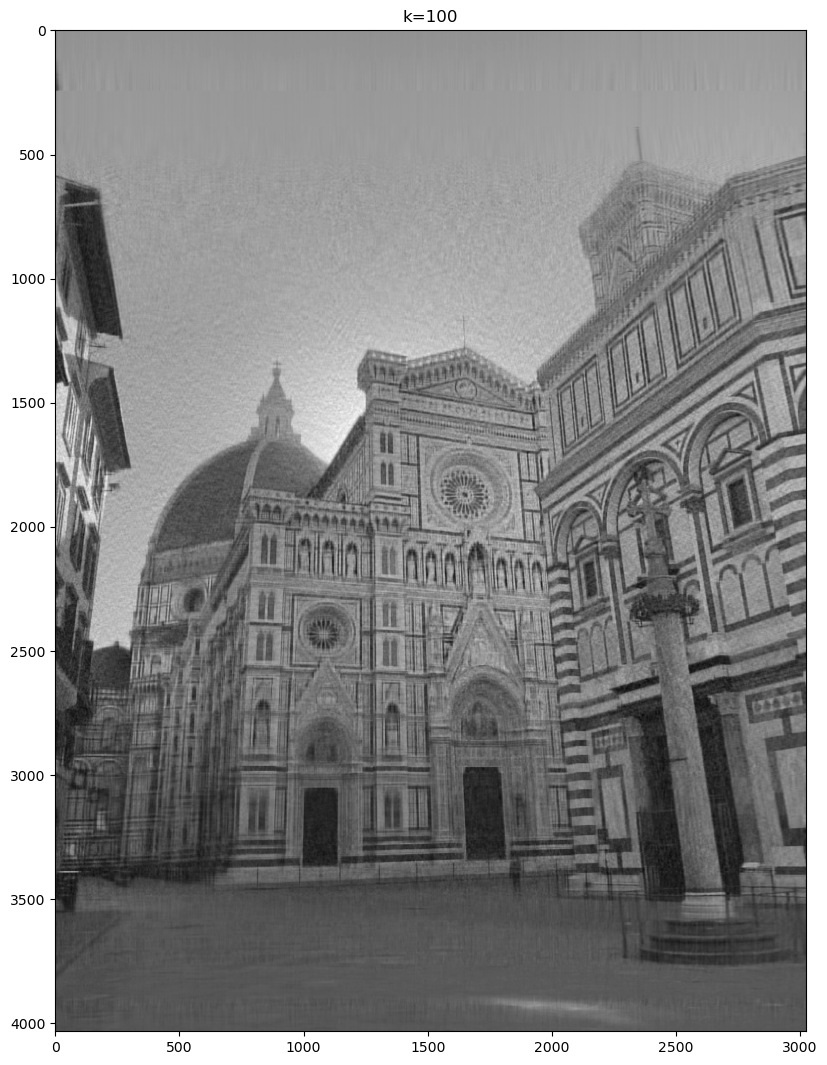

In [132]:
foto_mat_100=aprox_SVD(Umat,Smat,Vmat,100)
plt.figure(figsize=(10, 13))
plt.title("k=100")
plt.imshow(foto_mat_100, cmap='gray');

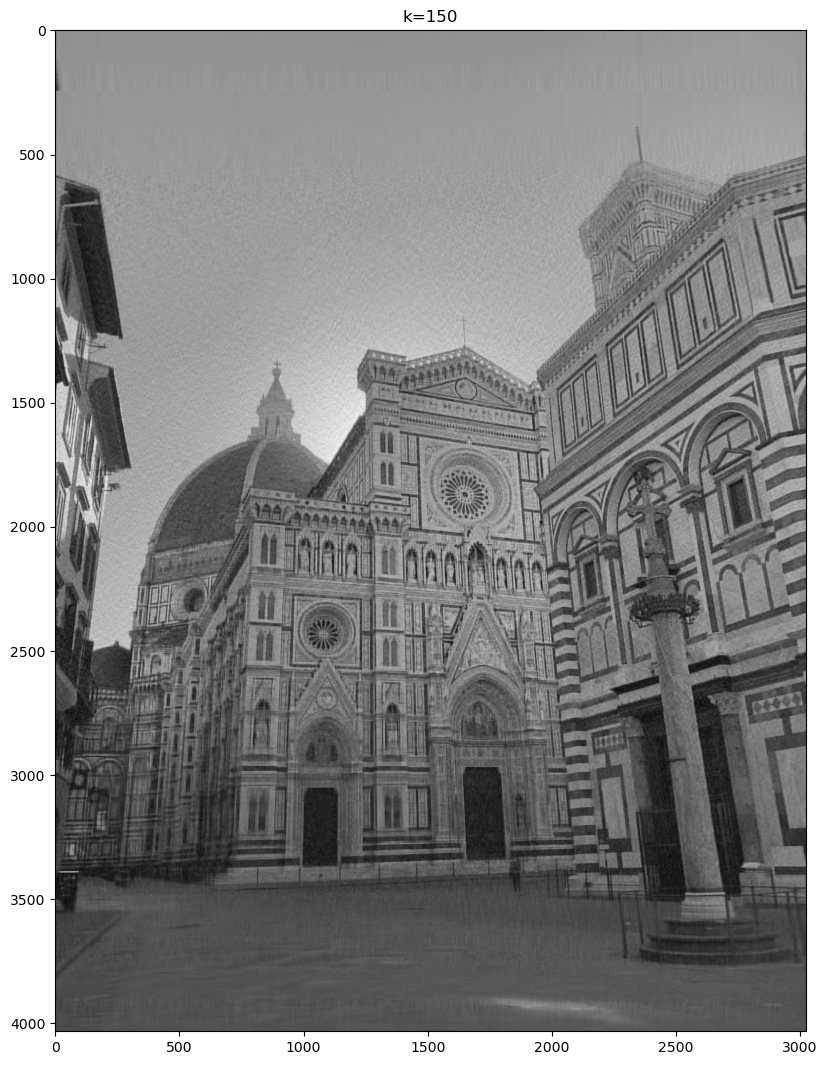

In [135]:
foto_mat_100=aprox_SVD(Umat,Smat,Vmat,150)
plt.figure(figsize=(10, 13))
plt.title("k=150")
plt.imshow(foto_mat_100, cmap='gray');

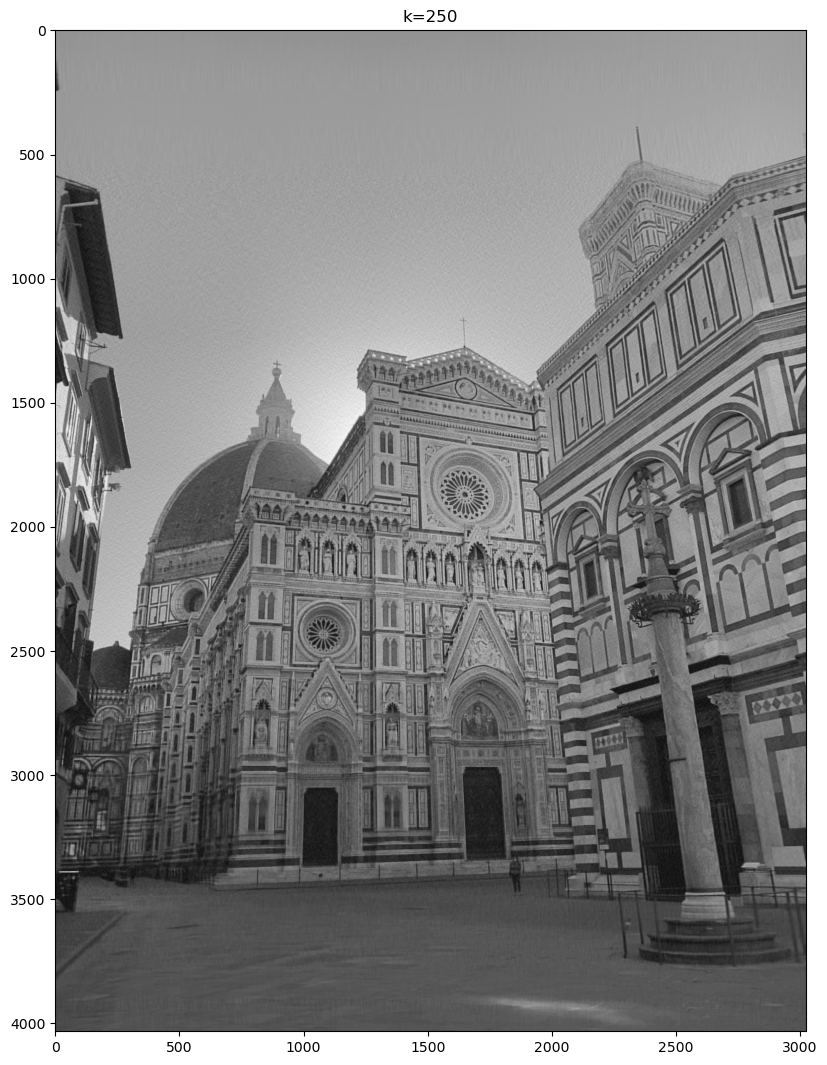

In [136]:
foto_mat_100=aprox_SVD(Umat,Smat,Vmat,250)
plt.figure(figsize=(10, 13))
plt.title("k=250")
plt.imshow(foto_mat_100, cmap='gray');

Con los 100 primeros valores singulares ya podemos observar bastante bien la imagen original. Lo destacable es que para calcular esta aproximación solamente hemos necesitado conocer $100\cdot 4032+100\cdot3024+100$ valores (los de las primeras 100 columnas de $U$, los de las primeras 100 filas de $V$ y los $100$ primeros valores singulares), mientras que para la foto original necesitábamos conocer los $4032\cdot 3024$ valores de su matriz asociada. 

**¡Esto significa que solamente estamos utilizando el $\dfrac{100\cdot \:4032+100\cdot 3024+100}{4032\cdot \:3024}=5.78\%$ de la información original!**


**Ejercicio.** Calcular la aproximación 500 e indicar el porcentaje de información requerido (alrededor del 29%).


Para realizar una aproximación de una imagen en color podemos utilizar la misma idea, pero con las tres matrices asociadas a la imagen (RGB).

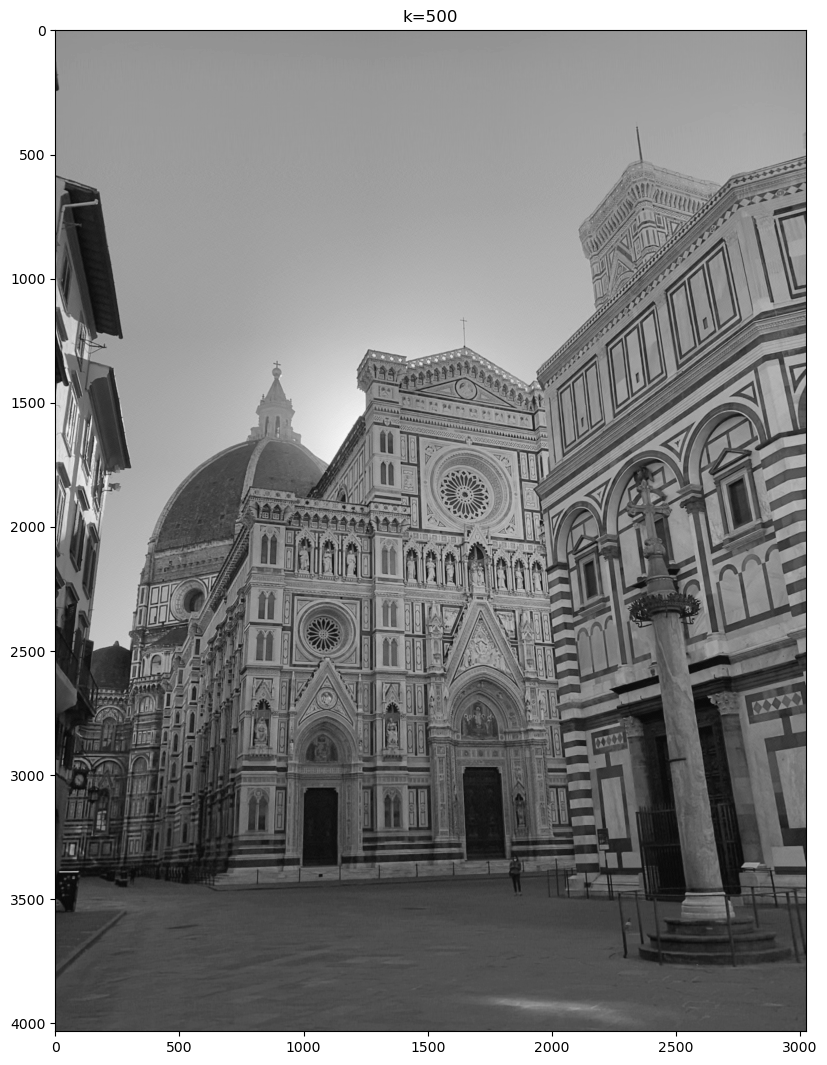

In [137]:
foto_mat_100=aprox_SVD(Umat,Smat,Vmat,500)
plt.figure(figsize=(10, 13))
plt.title("k=500")
plt.imshow(foto_mat_100, cmap='gray');